In [2]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import researchpy as rp
from scipy.stats import levene

In [3]:
df=pd.read_csv('../data/03-primas_bajas.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


# Pair Programming Asunciones Regresión Lineal

## Ana C y Ana G

### En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
- El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
- Normalidad (ya la deberíais haber evaluado)
- Homogeneidad de varianzas
- Independencia de las variables

#### Exploración de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [5]:
numericas=df.select_dtypes(np.number)
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


In [6]:
categoricas= df.select_dtypes(include='object')
categoricas.head(2)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast


# Asunción de normalidad ( recordemos para tenerlo todo junto)

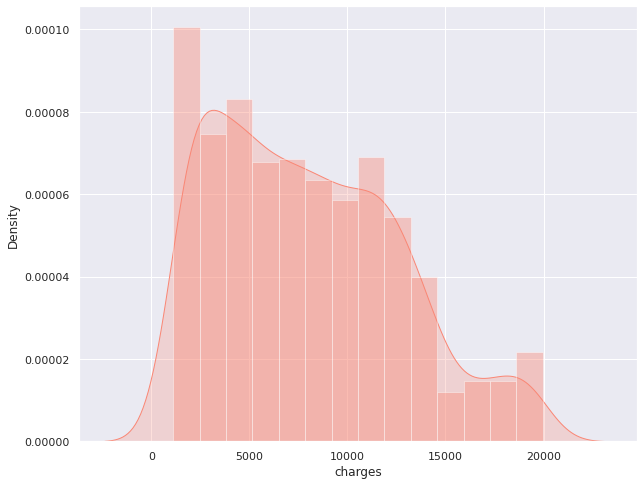

In [7]:
# primero lo hacemos visualmente
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"],  
    color = "#fa8775",
    kde_kws = {"shade": True, "linewidth": 1});

In [8]:
# Analiticamente
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.9519296288490295, pvalue=3.637755045551004e-18)

Resultado: 
- Recordemos que nuestros datos tanto **visualmente**( nuestra distribución no tiene forma de campana de Gauss)

    como **analiticamente** podemos ver en el test de shapiro **NO son normales**,

     ya que p-valor es menor que 0.05 y por lo tanto podemos rechazar la H0.

---

# Asunción de homocedasticidad de las varianzas en variables numericas

In [9]:
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


---

# Para la dispersión de numéricas realizaremos un regplot.

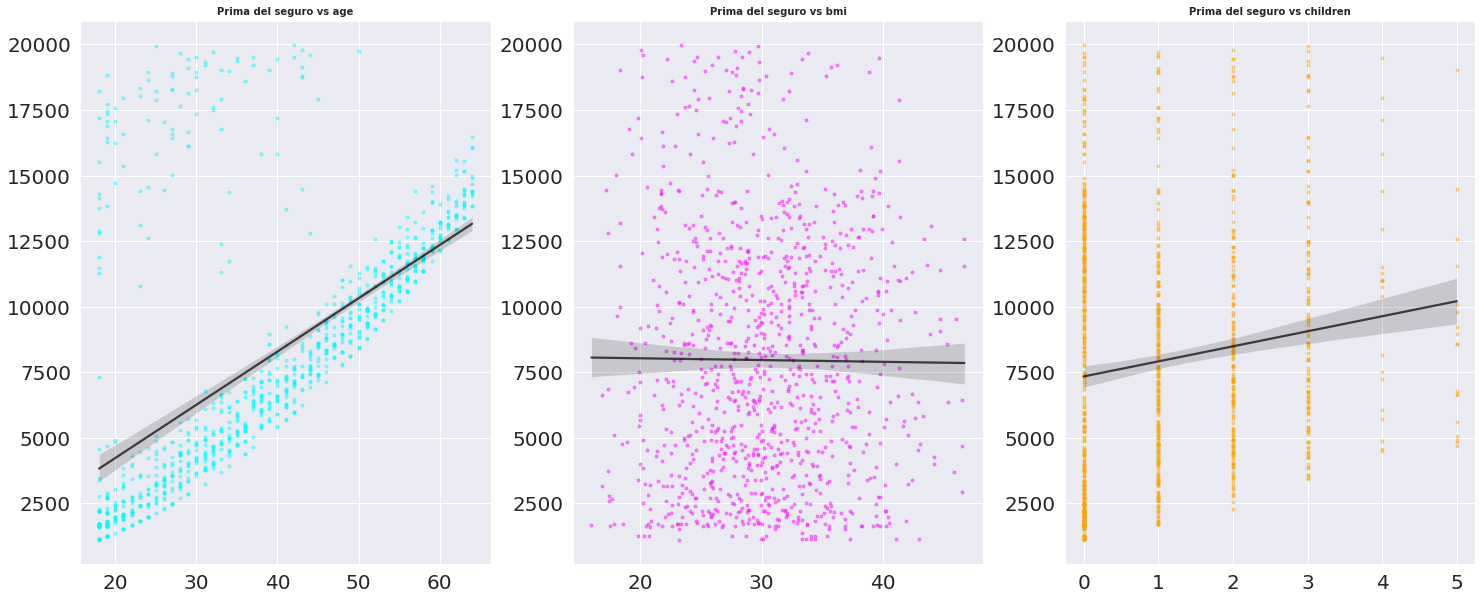

In [10]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 10))
axes = axes.flat
lista_colores = ["cyan", "magenta", "orange","blue", "green", "red", "cyan", "magenta", "orange"]
columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = lista_colores[i], 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Prima del seguro vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("");

Resultado:

Rechazamos H0 para todas las variables numericas, no son homocedasticas.

---

# Variables categóricas

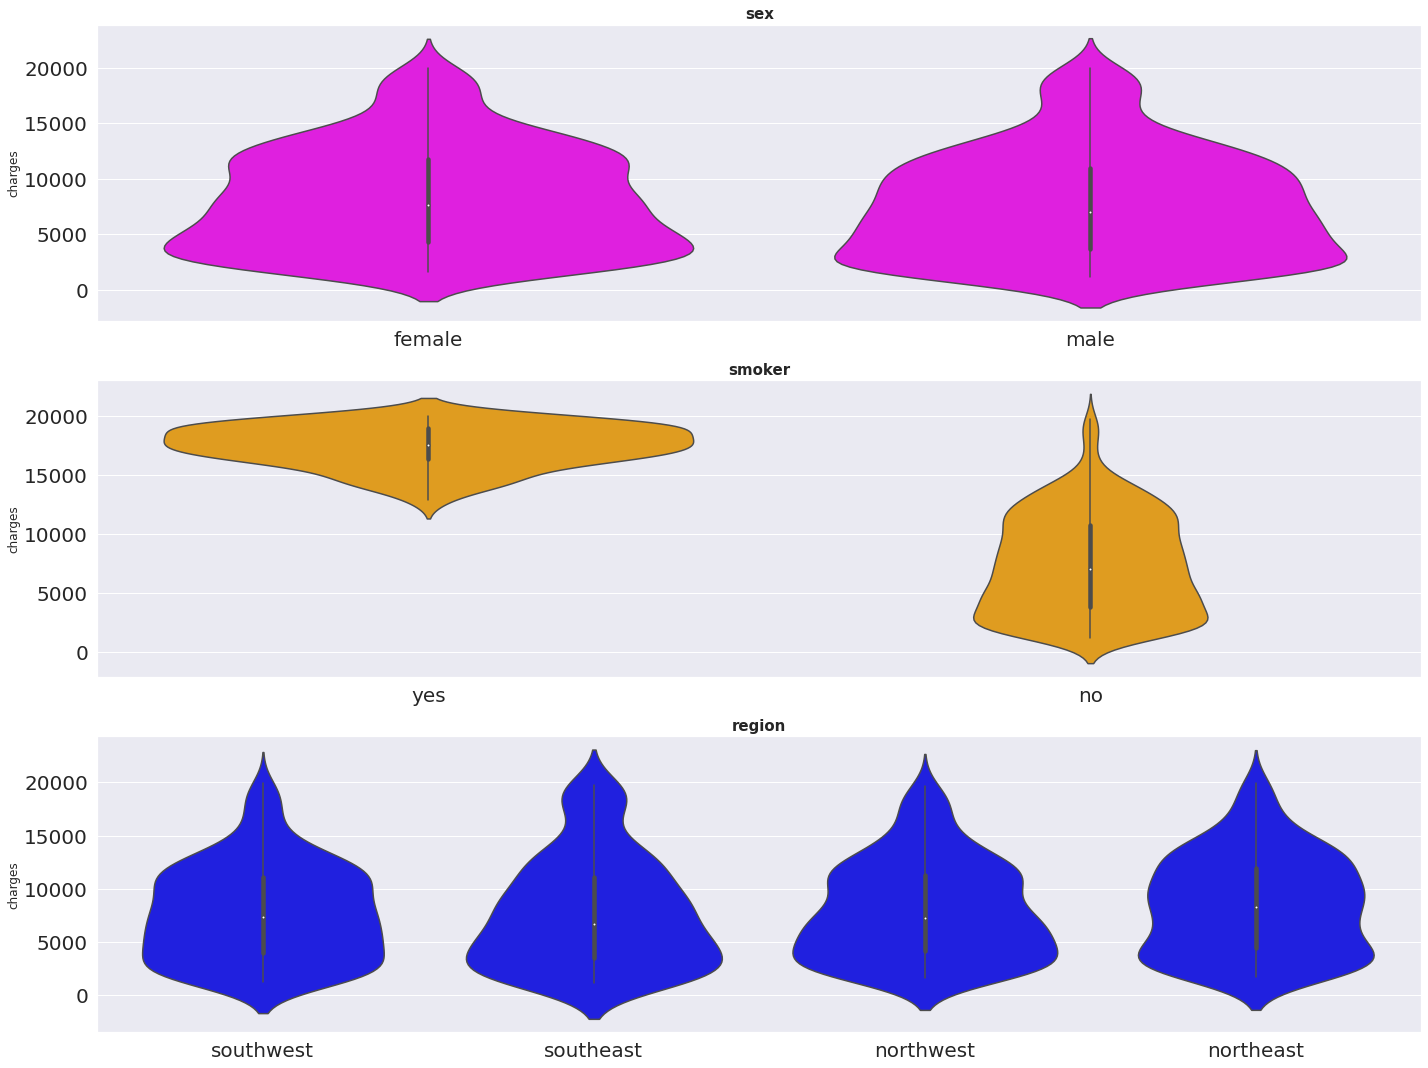

In [10]:
# violin plot

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))
axes = axes.flat
lista_colores = [ "magenta", "orange","blue", "green"]
columnas = df.select_dtypes(include = 'object')
columnas = columnas.columns
for i, colum in enumerate(columnas): 
    sns.violinplot(
        data = df,
        x = colum,
        y = 'charges',
        color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

In [12]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [13]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Género

In [15]:
mujer=df[df['sex']=='female']['charges']
hombre=df[df['sex']=='male']['charges']

Hábitos tabaquicos

In [16]:
fumadores=df[df['smoker']=='yes']['charges']
no_fumadores=df[df['smoker']=='no']['charges']

Región

In [17]:
sw=df[df['region']=='southwest']['charges']
se=df[df['region']=='southeast']['charges']
nw=df[df['region']=='northwest']['charges']
ne=df[df['region']=='northeast']['charges']



# Analiticamente variables categóricas

## Test de levene

Género

In [18]:
levene_genero=stats.levene(mujer,hombre,center='median')
levene_genero

LeveneResult(statistic=0.014307877636811713, pvalue=0.90481033143731)

Hábitos tabaquicos

In [19]:
levene_tabaco=stats.levene(fumadores,no_fumadores,center='median')
levene_tabaco

LeveneResult(statistic=52.502355819402666, pvalue=8.249768434771198e-13)

Regiones

In [20]:
levene_estado=stats.levene(sw,se,nw,ne,center='median')
levene_estado

LeveneResult(statistic=1.7043495481219235, pvalue=0.1643972118055969)

## Test bartlett

Hábito tabaquicos

In [21]:
bartlett_tabaco=stats.bartlett(fumadores,no_fumadores)
bartlett_tabaco

BartlettResult(statistic=54.03362795764284, pvalue=1.9708749087202543e-13)

Conclusiones
>- Para género y estado, nuestro p-valor es mayor de 0.05, por lo tanto los datos son homocedásticos
>- Sin embargo para fumadores nuestro p valor es menor de 0.05, por lo tanto los datos son heterocedásticos

## Analiticamente Variables númericas

In [22]:
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


In [23]:
# creamos un diccionario para almacenar los resultados de los test
resultados_test = {}
numericas_col = df.select_dtypes(include = np.number).drop("charges", axis = 1).columns
for col in numericas_col:
    statistic, p_val = levene(df[col], df.charges, center='median')
    resultados_test[col] = p_val

In [24]:
resultados_test

{'age': 0.0, 'bmi': 0.0, 'children': 0.0}

Resultado: Los p-valor para todas las numéricas, son menores de 0.05, rechazamos H0, nuestras variables son con varianzas heterocedásticas, no son constantes.


---

# Asunción de independencia

BMI y edad

In [32]:
# aplicaremos el mismo código que en el caso anterior, pero en este caso cambiaremos una de las variables. 
crosstab, test_results, expected = rp.crosstab(df["bmi"], df["age"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [33]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 22770.0) =,22769.6564
1,p-value =,0.4994
2,Cramer's V =,0.6821


BMI e hijos

In [34]:
# aplicaremos el mismo código que en el caso anterior, pero en este caso cambiaremos una de las variables. 
crosstab2, test_results2, expected2 = rp.crosstab(df["bmi"], df["children"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [35]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 2475.0) =,2497.5555
1,p-value =,0.3710
2,Cramer's V =,0.6852


>- Nuestro p-valor es **mayor** a 0.05, por lo tanto no se puede concluir que las variables estén asociadas(no se puede rechazar H0). 
>- Nuestras variables son **independientes**
>- El test de Cramer tiene un valor mayor a 0.5, por lo que la independencia es **alta**.

Edad e hijos

In [36]:
# aplicaremos el mismo código que en el caso anterior, pero en este caso cambiaremos una de las variables. 
crosstab3, test_results3, expected3 = rp.crosstab(df["age"], df["children"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [37]:
test_results3

,Chi-square test,results
0,Pearson Chi-square ( 230.0) =,441.1662
1,p-value =,0.0000
2,Cramer's V =,0.2880


>- En el caso de estas variables, edad e hijos, si son **dependientes**, con p-valor<0.05
>- Según el valor de Cramer la **independencia** es **baja** ya que esta entre los valores 0.1 y 0.3